In [2]:
from netCDF4 import Dataset as netcdf 
from scipy import signal

from pylab import *
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
#import cftime
#from cftime import utime
import pandas as pd
from matplotlib import pyplot as plt
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import zipfile
import xarray as xr


/usr/lib/python3/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [28]:
import dask

ModuleNotFoundError: No module named 'dask'

In [3]:
#load data as an xarray
import xarray as xr
ds = xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/ERA_5/download_Arctic.nc')
var=ds['t2m']
vname='2m Temperature'
var_y = var.groupby('time.year').mean(dim='time')
labels= var.units
fontsize = 18
svalbard = var.sel(latitude=range(74,84),longitude=range(0,43))
sva_y = svalbard.groupby('time.year').mean(dim='time')

xmin=255
xmax=280
var

<xarray.DataArray 't2m' (time: 492, latitude: 121, longitude: 1440)>
[85726080 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.75 -179.5 ... 179.25 179.5 179.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 60.5 60.25 60.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

### Svalbard

In [5]:
svalbard = var.sel(latitude=range(74,84),longitude=range(0,43))
sva_y = svalbard.groupby('time.year').mean(dim='time')

xmin=255
xmax=280

In [17]:
var=ds['sst']
vname='SST'
var_y = var.groupby('time.year').mean(dim='time')
labels= var.units
fontsize = 18
svalbard = var.sel(latitude=range(74,84),longitude=range(0,43))
sva_y2 = svalbard.groupby('time.year').mean(dim='time')

xmin2=265
xmax2=280

In [27]:
ds = xr.open_mfdataset('/home/s1423313/Documents/Sense_EDI/Svalbard/Scripts/SeaIce/NSIDC/NSIDC/seaice_conc_monthly_nh_f17_201*.nc')
var=ds['seaice_conc_monthly_cdr']
vname='SIC'
var_y = var.groupby('time.year').mean(dim='time')
fontsize = 18
svalbard = var.sel(latitude=range(74,84),longitude=range(0,43))
sva_y3 = svalbard.groupby('time.year').mean(dim='time')

xmin3=255
xmax3=280

/scratch/s1423313/.conda/envs/sense2020/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'melt_onset_day_seaice_conc_monthly_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


ModuleNotFoundError: No module named 'dask'

In [ ]:

fig= plt.figure(figsize=(30, 30))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

avg_sval_2010 = sva_y.sel(year=2010)
avg_sval_2019 = sva_y.sel(year=2019)

avg_sval_20102 = sva_y2.sel(year=2010)
avg_sval_20192= sva_y2.sel(year=2019)

avg_sval_20103 = sva_y3.sel(year=2010)
avg_sval_20193 = sva_y3.sel(year=2019)

svalbard_extent=[-8,52,72,84]
proj=ccrs.LambertConformal(central_longitude=22.5, central_latitude=79.0, globe=None)

ax1 = fig.add_subplot(331, projection = proj)
ax1.coastlines()
ax1.set_extent(svalbard_extent, ccrs.PlateCarree())
ax1.gridlines()
avg_sval_2010.plot(ax=ax1, transform=ccrs.PlateCarree(),  vmin=xmin,vmax=xmax, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax1.set_title('Svalbard Mean '+vname+' 2010',fontsize =fontsize)


ax2 = fig.add_subplot(332, projection = proj)
ax2.coastlines()
ax2.set_extent(svalbard_extent, ccrs.PlateCarree())
ax2.gridlines()
avg_sval_2019.plot(ax=ax2, transform=ccrs.PlateCarree(),  vmin=xmin,vmax=xmax, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax2.set_title('Svalbard Mean '+vname+' 2019',fontsize =fontsize)

ax3 = fig.add_subplot(333, projection = proj)
ax3.coastlines()
ax3.set_extent(svalbard_extent, ccrs.PlateCarree())
ax3.gridlines()
(avg_sval_2019-avg_sval_2010).plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=-3,vmax=4, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax3.set_title('Svalbard Difference '+vname+' 2010-2019',fontsize =fontsize)


ax4 = fig.add_subplot(334, projection = proj)
ax4.coastlines()
ax4.set_extent(svalbard_extent, ccrs.PlateCarree())
ax4.gridlines()
ax4.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
avg_sval_20102.plot(ax=ax4, transform=ccrs.PlateCarree(),  vmin=xmin2,vmax=xmax2, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax4.set_title('Svalbard Mean '+vname+' 2010',fontsize =fontsize)

ax2 = fig.add_subplot(335, projection = proj)
ax2.coastlines()
ax2.set_extent(svalbard_extent, ccrs.PlateCarree())
ax2.gridlines()
ax2.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
avg_sval_20192.plot(ax=ax2, transform=ccrs.PlateCarree(),  vmin=xmin2,vmax=xmax2, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax2.set_title('Svalbard Mean '+vname+' 2019',fontsize =fontsize)

ax3 = fig.add_subplot(336, projection = proj)
ax3.coastlines()
ax3.set_extent(svalbard_extent, ccrs.PlateCarree())
ax3.gridlines()
ax3.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
(avg_sval_20192-avg_sval_20102).plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=-3,vmax=4, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax3.set_title('Svalbard Difference '+vname+' 2010-2019',fontsize =fontsize)

ax1 = fig.add_subplot(3371, projection = proj)
ax1.coastlines()
ax1.set_extent(svalbard_extent, ccrs.PlateCarree())
ax1.gridlines()
ax1.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
avg_sval_20103.plot(ax=ax1, transform=ccrs.PlateCarree(),  vmin=xmin,vmax=xmax, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax1.set_title('Svalbard Mean '+vname+' 2010',fontsize =fontsize)

ax2 = fig.add_subplot(338, projection = proj)
ax2.coastlines()
ax2.set_extent(svalbard_extent, ccrs.PlateCarree())
ax2.gridlines()
ax2.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
avg_sval_20193.plot(ax=ax2, transform=ccrs.PlateCarree(),  vmin=xmin,vmax=xmax, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax2.set_title('Svalbard Mean '+vname+' 2019',fontsize =fontsize)

ax3 = fig.add_subplot(339, projection = proj)
ax3.coastlines()
ax3.set_extent(svalbard_extent, ccrs.PlateCarree())
ax3.gridlines()
ax3.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
(avg_sval3_20193-avg_sval_2010).plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=-3,vmax=4, cbar_kwargs={'shrink': 0.4,'label':labels,'orientation':'horizontal'})
ax3.set_title('Svalbard Difference '+vname+' 2010-2019',fontsize =fontsize)

## Difference between 2010 and 2019

Text(0.5, 1.0, 'Svalbard Difference 2m Temperature 2010-2019')

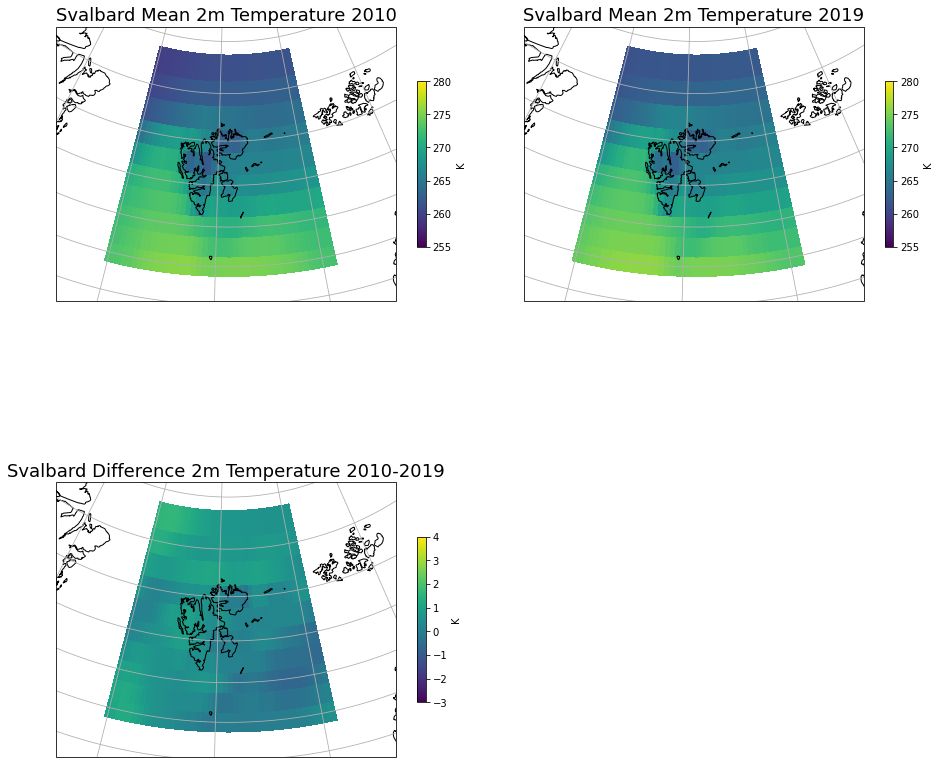

In [6]:

fig= plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

avg_sval_2010 = sva_y.sel(year=2010)
avg_sval_2019 = sva_y.sel(year=2019)
svalbard_extent=[-8,52,72,84]
proj=ccrs.LambertConformal(central_longitude=22.5, central_latitude=79.0, globe=None)

ax1 = fig.add_subplot(221, projection = proj)
ax1.coastlines()
ax1.set_extent(svalbard_extent, ccrs.PlateCarree())
ax1.gridlines()
avg_sval_2010.plot(ax=ax1, transform=ccrs.PlateCarree(),  vmin=xmin,vmax=xmax, cbar_kwargs={'shrink': 0.4,'label':labels})
ax1.set_title('Svalbard Mean '+vname+' 2010',fontsize =fontsize)

ax2 = fig.add_subplot(222, projection = proj)
ax2.coastlines()
ax2.set_extent(svalbard_extent, ccrs.PlateCarree())
ax2.gridlines()
avg_sval_2019.plot(ax=ax2, transform=ccrs.PlateCarree(),  vmin=xmin,vmax=xmax, cbar_kwargs={'shrink': 0.4,'label':labels})
ax2.set_title('Svalbard Mean '+vname+' 2019',fontsize =fontsize)

ax3 = fig.add_subplot(223, projection = proj)
ax3.coastlines()
ax3.set_extent(svalbard_extent, ccrs.PlateCarree())
ax3.gridlines()
(avg_sval_2019-avg_sval_2010).plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=-3,vmax=4, cbar_kwargs={'shrink': 0.4,'label':labels})
ax3.set_title('Svalbard Difference '+vname+' 2010-2019',fontsize =fontsize)


## Difference between 2000s and 2010s

Text(0.5,1,'Svalbard Difference 2m Temperature 2000s-2010s')

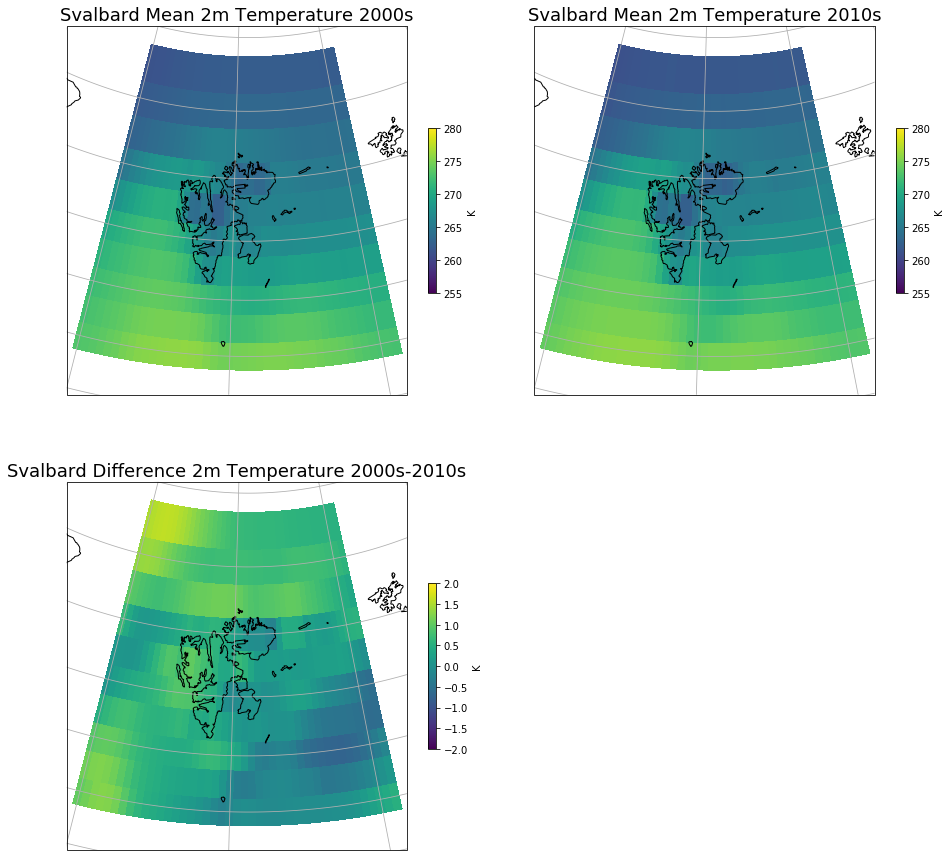

In [25]:
fig= plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

avg_sval_2000s = svalbard.loc["2000-01-01":"2009-12-01"].mean('time')
avg_sval_2010s = svalbard.loc["2010-01-01":"2019-12-01"].mean('time')

svalbard_extent=[0,42,72,84]
proj=ccrs.LambertConformal(central_longitude=22.5, central_latitude=79.0, globe=None)

ax1 = fig.add_subplot(221, projection = proj)
ax1.coastlines()
ax1.set_extent(svalbard_extent, ccrs.PlateCarree())
ax1.gridlines()
avg_sval_2000s.plot(ax=ax1, transform=ccrs.PlateCarree(),vmin=xmin,vmax=xmax, cbar_kwargs={'shrink': 0.4,'label':labels})
ax1.set_title('Svalbard Mean '+vname+' 2000s',fontsize =fontsize)

ax2 = fig.add_subplot(222, projection = proj)
ax2.coastlines()
ax2.set_extent(svalbard_extent, ccrs.PlateCarree())
ax2.gridlines()
avg_sval_2019.plot(ax=ax2, transform=ccrs.PlateCarree(),vmin=xmin,vmax=xmax, cbar_kwargs={'shrink': 0.4,'label':labels})
ax2.set_title('Svalbard Mean '+vname+' 2010s',fontsize =fontsize)

ax3 = fig.add_subplot(223, projection = proj)
ax3.coastlines()
ax3.set_extent(svalbard_extent, ccrs.PlateCarree())
ax3.gridlines()
(avg_sval_2019-avg_sval_2010).plot(ax=ax3, transform=ccrs.PlateCarree(),vmin=-2,vmax=2, cbar_kwargs={'shrink': 0.4,'label':labels})
ax3.set_title('Svalbard Difference '+vname+' 2000s-2010s',fontsize =fontsize)

In [6]:
svalbard_NE = var.sel(latitude=range(79,84),longitude=range(21,43),time=slice('2010-01-01','2020-12-31'))
svalbard_NW = var.sel(latitude=range(79,84),longitude=range(0,21),time=slice('2010-01-01','2020-12-31'))
svalbard_SE = var.sel(latitude=range(74,79),longitude=range(21,43),time=slice('2010-01-01','2020-12-31'))
svalbard_SW = var.sel(latitude=range(74,79),longitude=range(0,21),time=slice('2010-01-01','2020-12-31'))

In [7]:
svalbard_NE = var.sel(latitude=range(79,84),longitude=range(21,43))
svalbard_NW = var.sel(latitude=range(79,84),longitude=range(0,21))
svalbard_SE = var.sel(latitude=range(74,79),longitude=range(21,43))
svalbard_SW = var.sel(latitude=range(74,79),longitude=range(0,21))


In [26]:
def remove_time_mean(x):
    return x - x.mean(dim='time')
def quaterplots(var,rname):
    monthly_annual_anom = var.groupby('time.month').apply(remove_time_mean)

    fig, (ax1, ax2) = plt.subplots(2, sharex=True ,figsize=(16,10))
    fig.suptitle(rname+' 2010-2020 '+vname  , fontsize=fontsize)
    monthly_annual_anom.mean(dim=('latitude','longitude')).cumsum().plot.line(ax=ax1,x="time")
    ax1.set_ylabel(" Monthly Anomaly "+ str(var.units),fontsize=15)
    var.groupby('time.month').mean(dim=('latitude','longitude')).plot(ax=ax2)
    ax2.set_ylabel(str(var.units),fontsize=15)
    plt.show()

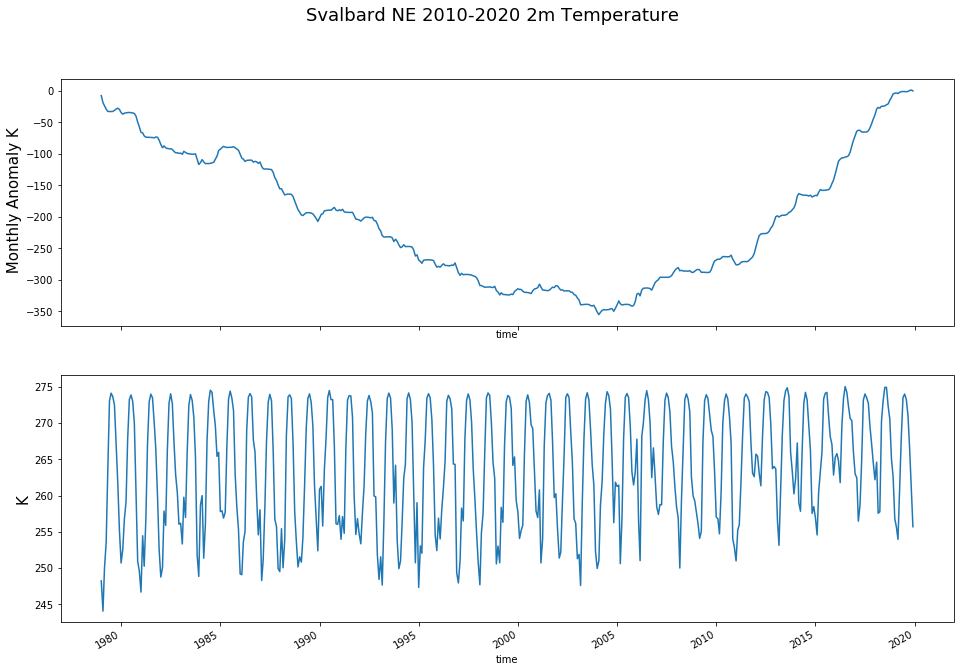

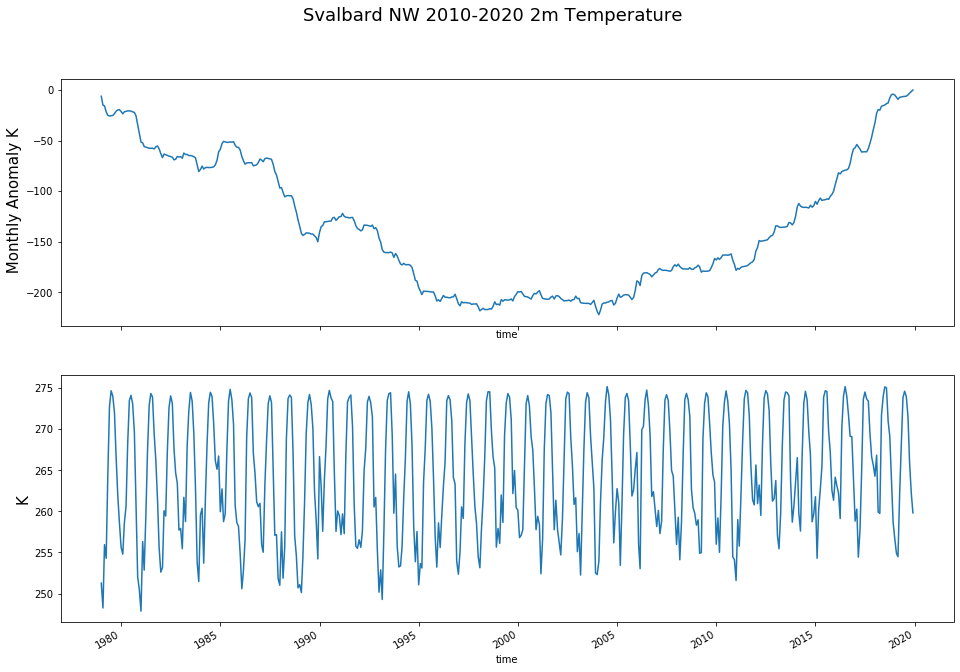

In [27]:
quaterplots(svalbard_NE,'Svalbard NE')
quaterplots(svalbard_NW,'Svalbard NW')


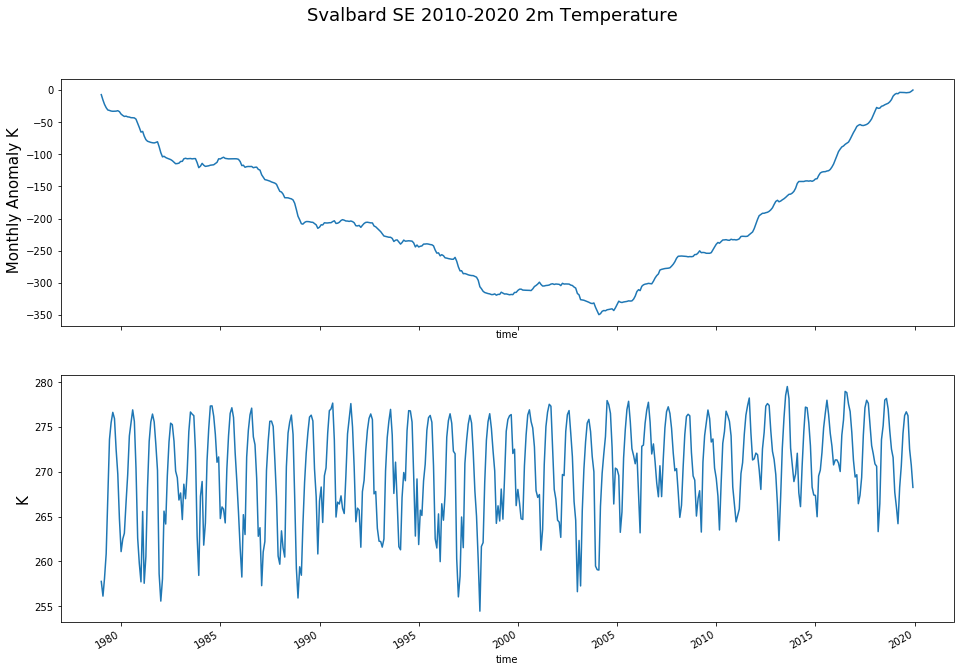

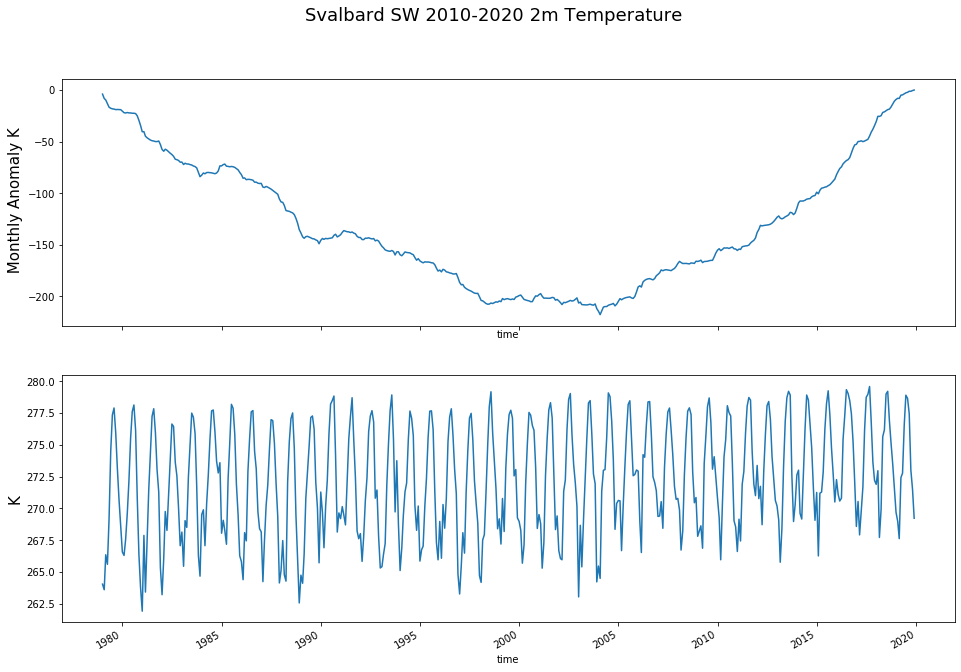

In [28]:
quaterplots(svalbard_SE,'Svalbard SE')
quaterplots(svalbard_SW,'Svalbard SW')

## Monthly Difference 2010-2019

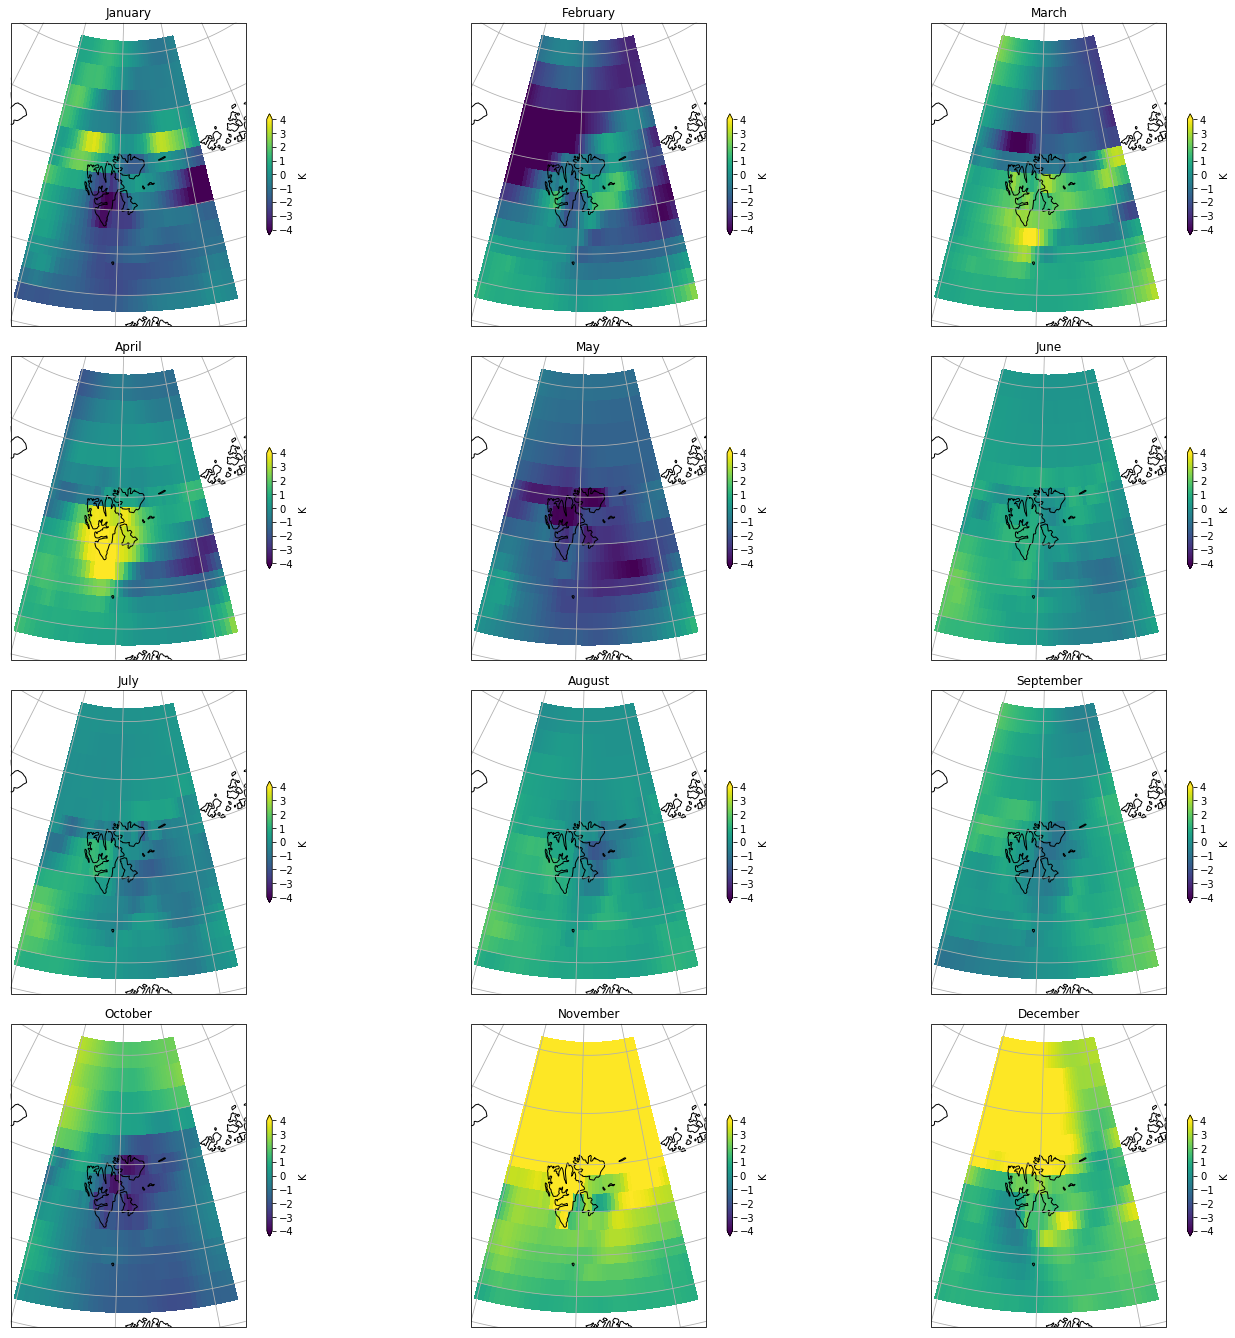

In [72]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(24, 24),subplot_kw={'projection': proj})
fig.subplots_adjust(hspace=0.1, wspace=0.1)
list_months=['January','February','March','April','May','June','July','August','September','October','November','December']
x=4

for i in range(3):
    ax=ax1[i]
    ax.coastlines()
    ax.set_extent(svalbard_extent, ccrs.PlateCarree())
    ax.gridlines()
    (svalbard.isel(time=i+40*12)-svalbard.isel(time=i+31*12)).plot(ax=ax,transform=ccrs.PlateCarree(),  vmin=-x,vmax=x,extend='both',cbar_kwargs={'shrink': 0.4,'label':labels})
    ax.set_title(list_months[i])
 

for i in range(3):
    ax=ax2[i]
    ax.coastlines()
    ax.set_extent(svalbard_extent, ccrs.PlateCarree())
    ax.gridlines()
    (svalbard.isel(time=i+3+40*12)-svalbard.isel(time=i+3+31*12)).plot(ax=ax,transform=ccrs.PlateCarree(), vmin=-x,vmax=x,extend='both',cbar_kwargs={'shrink': 0.4,'label':labels})
    ax.set_title(list_months[i+3])

for i in range(3):
    ax=ax3[i]
    ax.coastlines()
    ax.set_extent(svalbard_extent, ccrs.PlateCarree())
    ax.gridlines()
    (svalbard.isel(time=i+6+40*12)-svalbard.isel(time=i+6+31*12)).plot(ax=ax,transform=ccrs.PlateCarree(), vmin=-x,vmax=x,extend='both',cbar_kwargs={'shrink': 0.4,'label':labels})
    ax.set_title(list_months[i+6])


for i in range(3):
    ax=ax4[i]
    ax.coastlines()
    ax.set_extent(svalbard_extent, ccrs.PlateCarree())
    ax.gridlines()
    (svalbard.isel(time=i+9+40*12)-svalbard.isel(time=i+9+31*12)).plot(ax=ax,transform=ccrs.PlateCarree(),vmin=-x,vmax=x,extend='both',cbar_kwargs={'shrink': 0.4,'label':labels})
    ax.set_title(list_months[i+9])



## Monthly Difference 2000s and 2010s

In [73]:
avg_sval_2000s_mon=svalbard.loc["2000-01-01":"2009-12-01"].groupby('time.month').mean(dim='time')
avg_sval_2010s_mon=svalbard.loc["2010-01-01":"2019-12-01"].groupby('time.month').mean(dim='time')

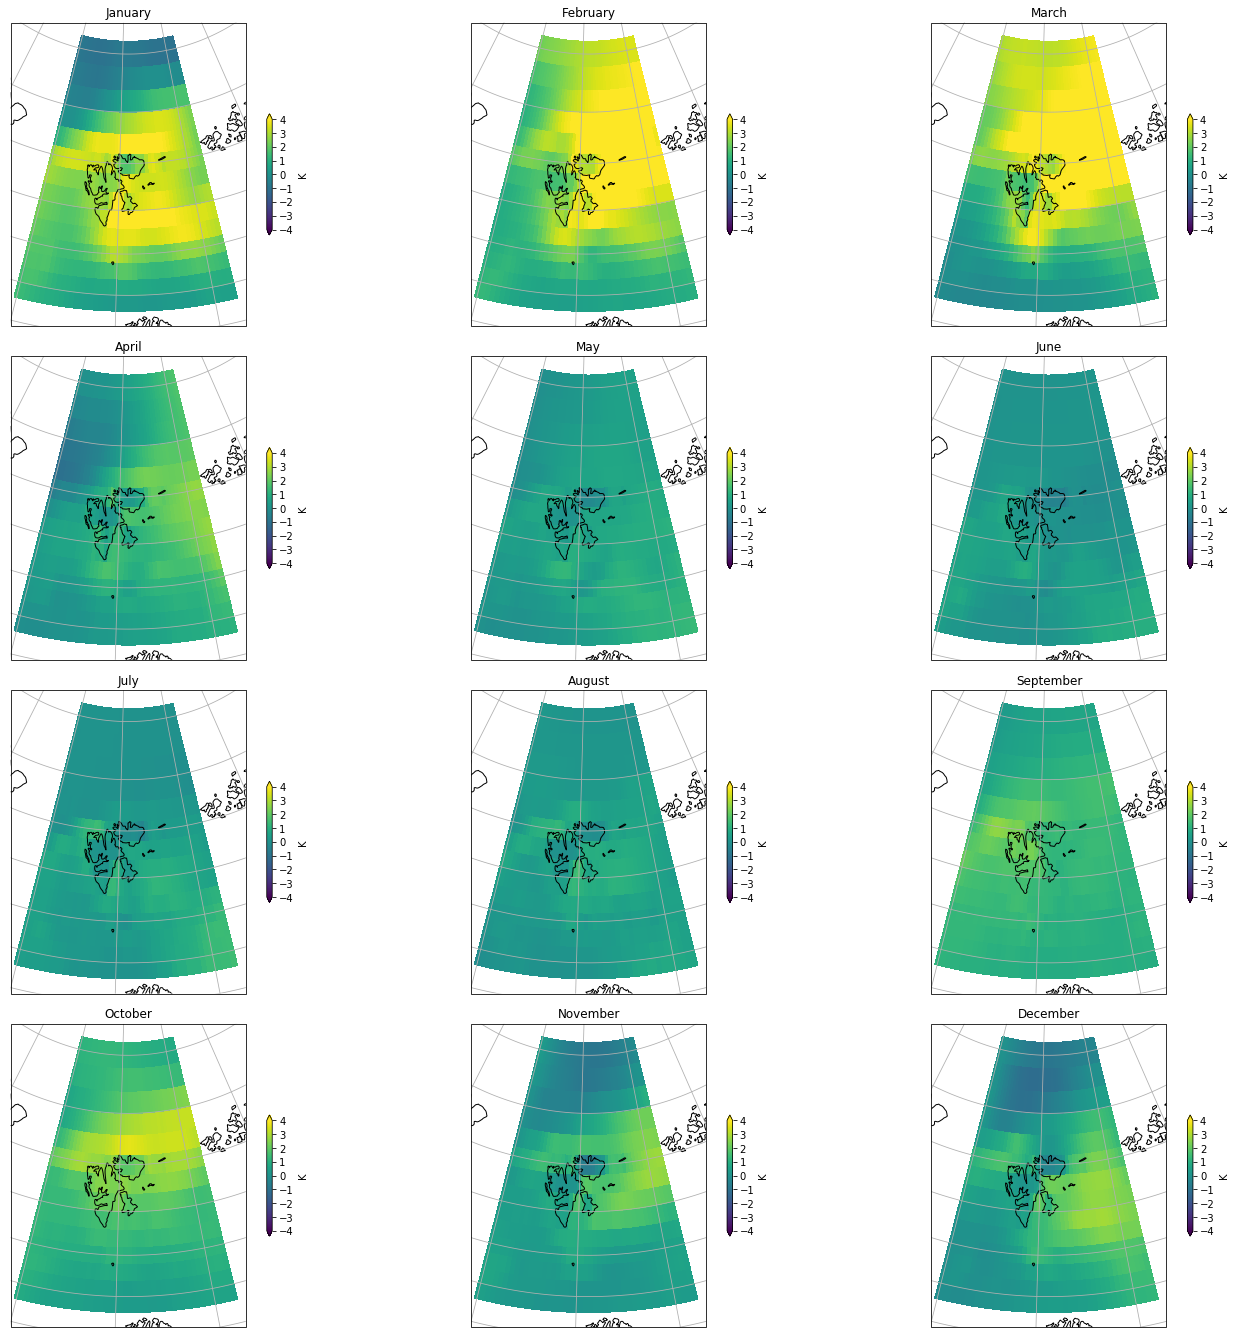

In [75]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(24, 24),subplot_kw={'projection': proj})
fig.subplots_adjust(hspace=0.1, wspace=0.1)
list_months=['January','February','March','April','May','June','July','August','September','October','November','December']
x=4

for i in range(3):
    ax=ax1[i]
    ax.coastlines()
    ax.set_extent(svalbard_extent, ccrs.PlateCarree())
    ax.gridlines()
    (avg_sval_2010s_mon.isel(month=i)-avg_sval_2000s_mon.isel(month=i)).plot(ax=ax,transform=ccrs.PlateCarree(), vmin=-x,vmax=x,extend='both',cbar_kwargs={'shrink': 0.4,'label':labels})
    ax.set_title(list_months[i])
 

for i in range(3):
    ax=ax2[i]
    ax.coastlines()
    ax.set_extent(svalbard_extent, ccrs.PlateCarree())
    ax.gridlines()
    (avg_sval_2010s_mon.isel(month=i+3)-avg_sval_2000s_mon.isel(month=i+3)).plot(ax=ax,transform=ccrs.PlateCarree(), vmin=-x,vmax=x,extend='both',cbar_kwargs={'shrink': 0.4,'label':labels})
    ax.set_title(list_months[i+3])

for i in range(3):
    ax=ax3[i]
    ax.coastlines()
    ax.set_extent(svalbard_extent, ccrs.PlateCarree())
    ax.gridlines()
    (avg_sval_2010s_mon.isel(month=i+6)-avg_sval_2000s_mon.isel(month=i+6)).plot(ax=ax,transform=ccrs.PlateCarree(), vmin=-x,vmax=x,extend='both',cbar_kwargs={'shrink': 0.4,'label':labels})
    ax.set_title(list_months[i+6])


for i in range(3):
    ax=ax4[i]
    ax.coastlines()
    ax.set_extent(svalbard_extent, ccrs.PlateCarree())
    ax.gridlines()
    (avg_sval_2010s_mon.isel(month=i+9)-avg_sval_2000s_mon.isel(month=i+9)).plot(ax=ax,transform=ccrs.PlateCarree(),vmin=-x,vmax=x,extend='both',cbar_kwargs={'shrink': 0.4,'label':labels})
    ax.set_title(list_months[i+9])


In [43]:
#Mean
avg_sval_2010s = svalbard.loc['2010-01-01':'2019-12-01'].mean(dim='time')

#STD
std_sval_2010s =svalbard.loc['2010-01-01':'2019-12-01'].std(dim='time')



avg_sval_all = svalbard.mean(dim='time')
#STD
std_sval_all = svalbard.loc['2010-01-01':'2019-12-01'].std(dim='time')




Text(0.5,1,'Svalbard 2m Temperature Anomaly 2019 (1979-2019)')

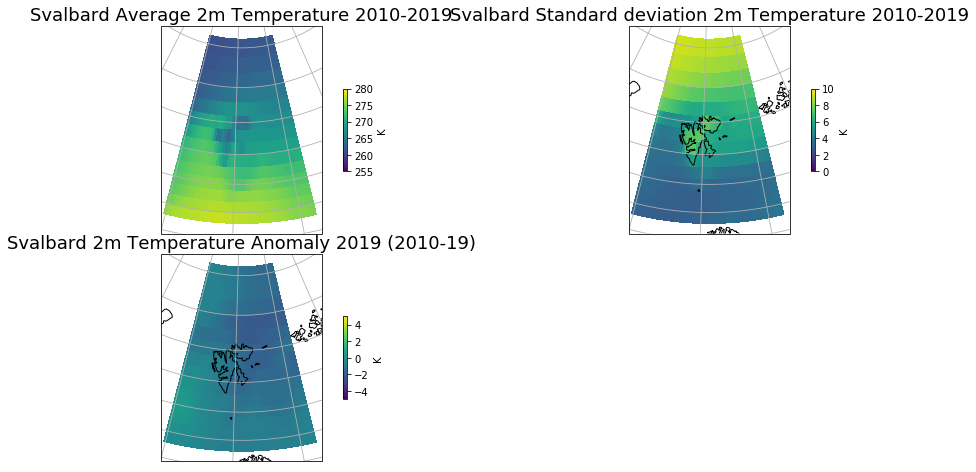

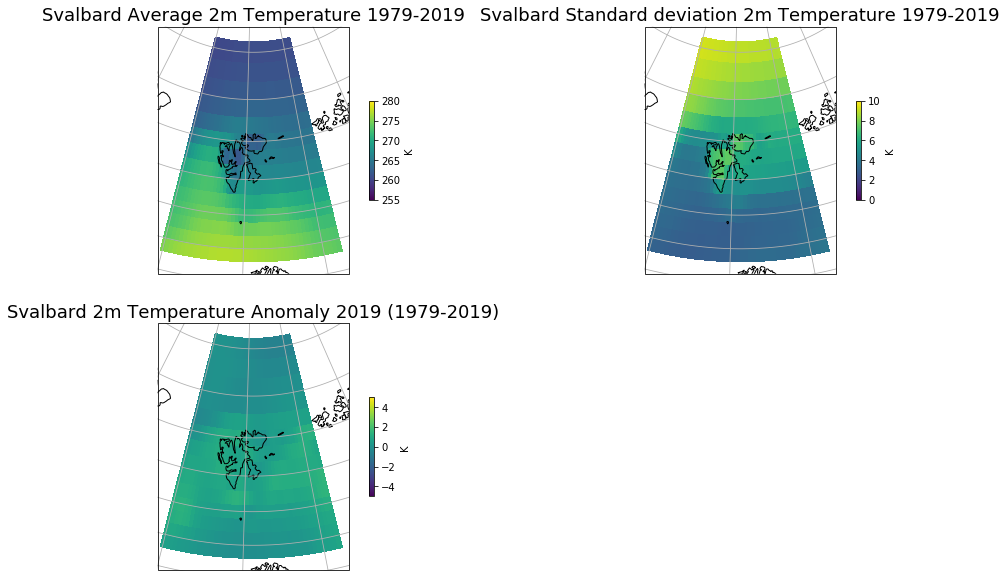

In [45]:
fig= plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(221, projection = proj)
ax2.coastlines()
ax1.set_extent(svalbard_extent, ccrs.PlateCarree())
ax1.gridlines()
avg_sval_2010s.plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=255,vmax=280, cbar_kwargs={'shrink': 0.4,'label':labels})
ax1.set_title('Svalbard Average ' +vname+' 2010-2019',fontsize=fontsize)

ax2 = fig.add_subplot(222, projection = proj)
ax2.coastlines()
ax2.set_extent(svalbard_extent, ccrs.PlateCarree())
ax2.gridlines()
std_sval_2010s.plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=0,vmax=10, cbar_kwargs={'shrink': 0.4,'label':labels})
ax2.set_title('Svalbard Standard deviation '+vname+' 2010-2019',fontsize=fontsize)

ax3 = fig.add_subplot(223, projection = proj)
ax3.coastlines()
ax3.set_extent(svalbard_extent, ccrs.PlateCarree())
ax3.gridlines()
(avg_sval_2019-avg_sval_2010s).plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=-5,vmax=5, cbar_kwargs={'shrink': 0.4,'label':labels})
ax3.set_title('Svalbard ' +vname+' Anomaly 2019 (2010-19)',fontsize=fontsize)


fig2= plt.figure(figsize=(16, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig2.add_subplot(221, projection = proj)
ax1.coastlines()
ax1.set_extent(svalbard_extent, ccrs.PlateCarree())
ax1.gridlines()
avg_sval_all.plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=255,vmax=280, cbar_kwargs={'shrink': 0.4,'label':labels})
ax1.set_title('Svalbard Average ' +vname+' 1979-2019',fontsize=fontsize)

ax2 = fig2.add_subplot(222, projection = proj)
ax2.coastlines()
ax2.set_extent(svalbard_extent, ccrs.PlateCarree())
ax2.gridlines()
std_sval_all.plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=0,vmax=10, cbar_kwargs={'shrink': 0.4,'label':labels})
ax2.set_title('Svalbard Standard deviation '+vname+' 1979-2019',fontsize=fontsize)

ax3 = fig2.add_subplot(223, projection = proj)
ax3.coastlines()
ax3.set_extent(svalbard_extent, ccrs.PlateCarree())
ax3.gridlines()
(avg_sval_2019-avg_all).plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=-5,vmax=5, cbar_kwargs={'shrink': 0.4,'label':labels})
ax3.set_title( 'Svalbard '+vname+' Anomaly 2019 (1979-2019)',fontsize=fontsize)


In [ ]:
#Read data
ncset = netcdf('download_ArcticSmall.nc', mode='r')
#To check which variables are in the netcdf files
#ncset.variables
ncset.set_auto_mask(False)

#Read variables
lon = ncset['longitude'][:]
lat = ncset['latitude'][:]
t = ncset['time'][:]                   # same as 
nctime = ncset.variables['time'][:]
var2 = ncset['t2m'][:]
t_unit = ncset.variables['time'].units # t_unit = t.units 
ncset.close()

try:
    t_cal = ncset.variables['time'].calendar
    t_cal = nctime.calendar
except AttributeError:  # Attribute doesn't exist
    t_cal = u"gregorian"  # or standard
utime = cftime.utime(t_unit, calendar=t_cal)
datevar = utime.num2date(nctime)

#lons lats on a grid
[lons, lats] = meshgrid(lon, lat)

#Size of array
var2.shape

In [ ]:
###############################################################################################
# Function to calculate the spatial mean of one field and write the trends in .dat files
# returns
#          ---> trend_time[year]
#          ---> trend_space[x,y]
#
# Similar code by Alek Petty
##############################################################################################

def cal_trend(start_year, num_years, start_month, num_months, nx, ny, var):

# Initialize
        x = nx
        y = ny

##################
# Maps of trends
##################

# Monthly averaged
        num_years
        years = np.arange(num_years)
        trend_ym = np.zeros((num_months, x, y))
        sig_a_ym = np.zeros((num_months, x, y))
        r_a_ym = np.zeros((num_months, x, y))
        int_a_ym = np.zeros((num_months, x, y))

        for month in range(num_months):
                print (month)
                var_y = np.mean(var,1)
                for i in range(x):
                        for j in range(y):
                                slope, intercept, r, prob, stderr = stats.linregress(years,var[start_year:start_year+num_years, month, i, j])
                                trend_ym[month, i, j] = slope
                                sig_a_ym[month, i, j] = 100*(1-prob)
                                r_a_ym[month, i, j] = r
                                int_a_ym[month, i, j] = intercept

# Yearly averaged
        years = np.arange(num_years)
        trend = np.zeros((x, y))
        sig_a = np.zeros((x, y))
        r_a = np.zeros((x, y))
        int_a = np.zeros((x, y))

        for i in range(x):
                for j in range(y):
                        slope, intercept, r, prob, stderr = stats.linregress(years,var_y[start_year:start_year+num_years, i, j])
                        trend[i, j] = slope
                        sig_a[i, j] = 100*(1-prob)
                        r_a[i, j] = r
                        int_a[i, j] = intercept

        return trend, trend_ym, sig_a, sig_a_ym, r_a, r_a_ym, int_a, int_a_ym

In [ ]:

var_ym=var.reshape(41,12,121,1440)
# print(t2m_ym[1,1,0,0],t2m[13,0,0])


start_year=1979-1979
num_years=41
start_month=0
num_months=12
nx=var_ym.shape[2]
ny=var_ym.shape[3]
var_trend, var_trend_ym, var_sig_a, var_sig_a_ym, var_r_a, var_r_a_ym, var_int_a, int_a_ym = cal_trend(start_year, num_years, start_month, num_months, nx, ny, var_ym)


In [ ]:
#Calculated with linregress
data=var_trend
ds_trend = xr.DataArray(data, coords=[ds.latitude,ds.longitude], dims=["longitude","latitude"])
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines()
(10.*ds_trend).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-1,vmax=3,extend='both', cbar_kwargs={'shrink': 0.4})
#(ds_trend).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), vmin=-1,vmax=1,extend='both', cbar_kwargs={'shrink': 0.4})
plt.title('Temperature trend (K/decade) for 1979-2019 ')

In [ ]:
#Create color scheme and colorbar
biasContDist=0.1
rgrColorTable=np.array(['#4457c9','#4f67d4','#6988ea','#84a6f9','#9ebdff','#b7d0fd','#cfdcf3','#ffffff','#f1d7c8','#f9c5ab','#f7aa8c','#f28d72','#df6553','#c93137','#bc052b'])
iContNr=len(rgrColorTable)
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)

data=var_trend
ds_trend = xr.DataArray(data, coords=[ds.latitude,ds.longitude], dims=["longitude","latitude"])
fig = plt.figure(figsize=(18,14.5))

ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines()
cs=plt.contourf(lons,lats,var_sig_a, hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0 ,transform=ccrs.PlateCarree())
plt.contourf(lons,lats,10.*ds_trend,colors=rgrColorTable,transform=ccrs.PlateCarree(), extend='both',levels=clevsTD, zorder=0)

plt.title('Temperature trend (K/decade) for 1979-2019 ')
plt.colorbar(ax=ax,shrink=0.4)

In [ ]:
list_months=['January','February','March','April','May','June','July','August','September','October','November','December']
month=10 #8 = September
data=var_trend_ym[month]
ds_trend = xr.DataArray(data, coords=[ds.latitude,ds.longitude], dims=["longitude","latitude"])
fig = plt.figure(figsize=(22,15))

ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines()

cs=plt.contourf(lons,lats,var _sig_a_ym[month], hatches=['','///'],levels=[0,90,100], zorder=1, alpha=0 ,transform=ccrs.PlateCarree()) #hatches significant
plt.contourf(lons,lats,10.*ds_trend,colors=rgrColorTable,transform=ccrs.PlateCarree(), extend='both',levels=clevsTD, zorder=0)
plt.title(list_months[month]+' temperature trend (K/decade) for 1979-2019 ')
plt.colorbar(ax=ax,shrink=0.4)

## Time series analysis 

[Text(0, 0.5, '2m Temperature')]

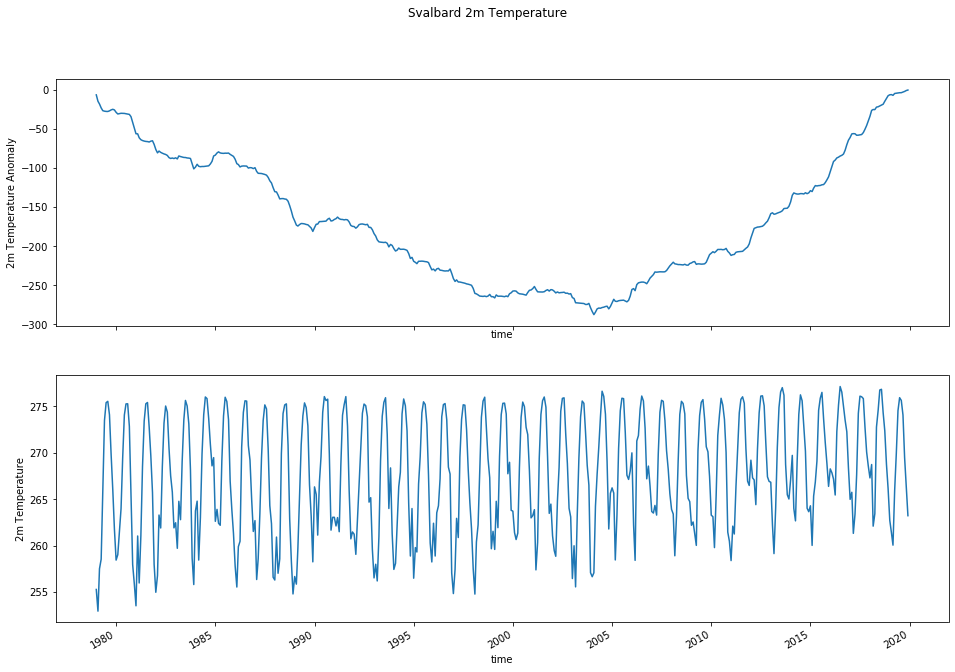

In [29]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

monthly_annual_anom = svalbard.groupby('time.month').apply(remove_time_mean)


fig, axes = plt.subplots(2, sharex=True, figsize=(16,10))
fig.suptitle('Svalbard '+vname)
monthly_annual_anom.mean(dim=('latitude','longitude')).cumsum().plot(ax=axes[0])
axes[0].set(ylabel= vname+' Anomaly')
svalbard.groupby('time.month').mean(dim=('latitude','longitude')).plot(ax=axes[1])
axes[1].set(ylabel= vname)

In [31]:
#https://github.com/geopy/geopy
#https://developers.google.com/maps/documentation/geocoding/overview
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Google Geocoding API (V3)")
location = geolocator.geocode("Nordaustlandet")
print(location.address)
print(geolocator.geocode("Nordaustlandet").longitude,geolocator.geocode("Nordaustlandet").latitude)

Nordaustlandet, Norge
22.690708618090994 79.8582046


Text(0.5, 1.0, 'Compare ERA5 temperature record for Nordaustlandet, Nordvest-Spitsbergen, and Sor-Spitsbergen')

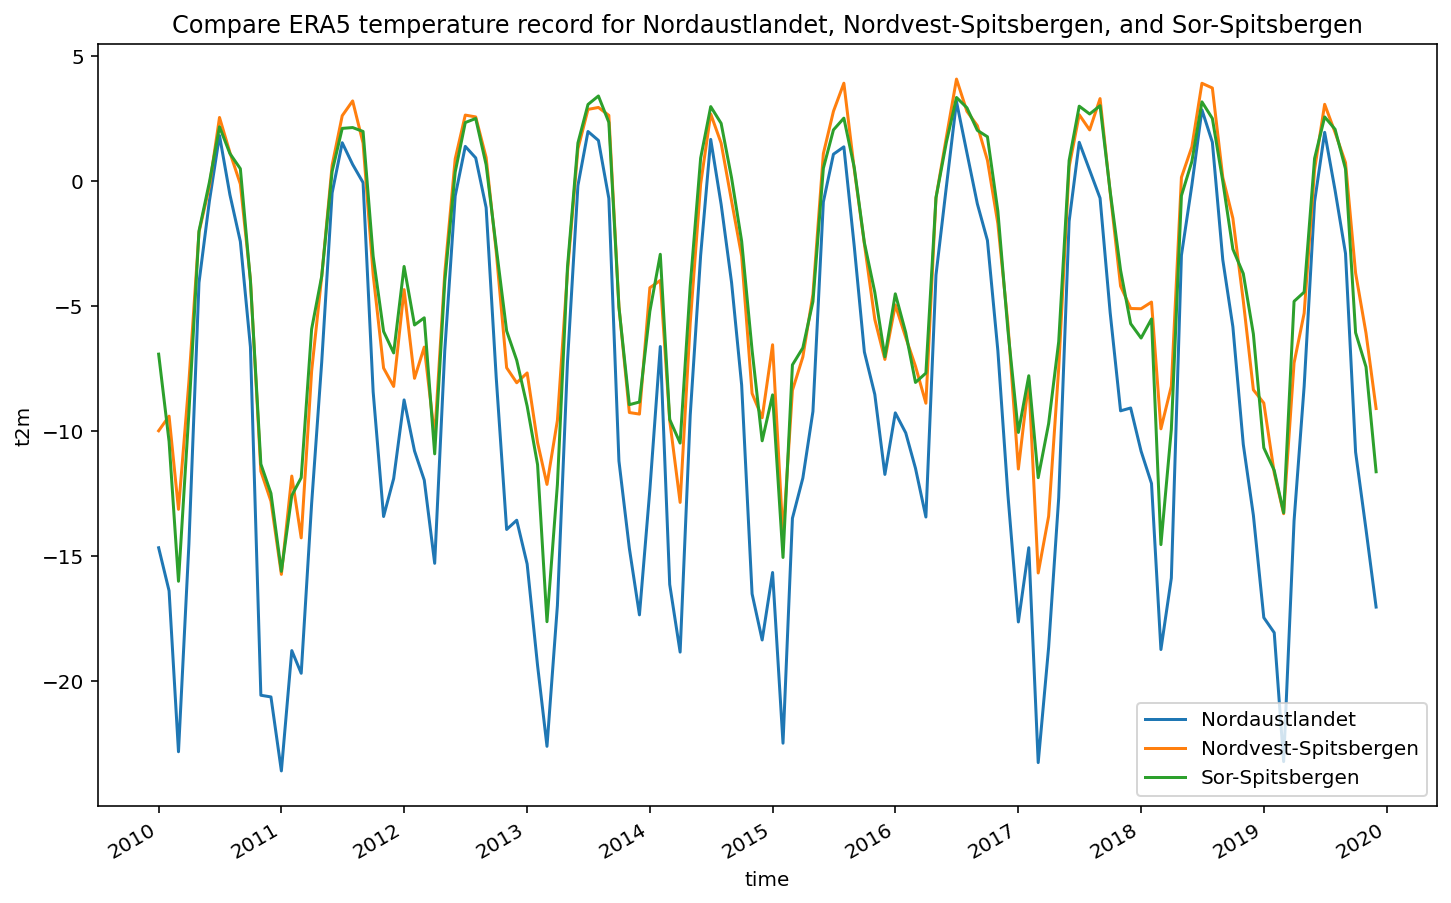

In [33]:

# Get coords of cities
lon1,lat1=geolocator.geocode("Nordaustlandet").longitude,geolocator.geocode("Nordaustlandet").latitude
lon2,lat2=geolocator.geocode("Nordvest-Spitsbergen").longitude,geolocator.geocode("Nordvest-Spitsbergen").latitude
lon3,lat3=geolocator.geocode("Sor-Spitsbergen").longitude,geolocator.geocode("Sor-Spitsbergen").latitude

# Get data for coords
(var.sel(longitude=lon1, latitude=lat1, method = 'nearest')-273.15).plot(x="time")
(var.sel(longitude=lon2, latitude=lat2, method = 'nearest')-273.15).plot(x="time")
(var.sel(longitude=lon3, latitude=lat3, method = 'nearest')-273.15).plot(x="time")

# labels = range(3)
labels = ['Nordaustlandet','Nordvest-Spitsbergen','Sor-Spitsbergen']
# plt.figure(figsize=(18,5))
plt.legend(labels,loc='lower right')
plt.title('Compare ERA5 temperature record for ' + labels[0] +', '+ labels[1]+ ', and ' +labels[2])
# ds.t2m.sel(longitude=geolocator.geocode("Athens").longitude, latitude=geolocator.geocode("Athens").latitude,method = 'nearest').plot(x="time")
# print(ds.t2m['longitude'])

One can remove the seasonal (monthly) cycle to only focus on temoperature anomalies

In [14]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

monthly_annual_anom = var.groupby('time.month').apply(remove_time_mean)
monthly_annual_anom.sel(longitude=lon1, latitude=lat1, method = 'nearest').plot.line(x="time")
monthly_annual_anom.sel(longitude=lon2, latitude=lat2, method = 'nearest').plot.line(x="time")
monthly_annual_anom.sel(longitude=lon3, latitude=lat3, method = 'nearest').plot.line(x="time")
labels = ['Nordaustlandet','Nordvest-Spitsbergen','Sor-Spitsbergen']
plt.legend(labels,loc='lower right')
plt.title('Compare ERA5 temperature anomaly record for ' + labels[0] +', '+ labels[1]+ ', and ' +labels[2])

NameError: name 'lon1' is not defined

In [0]:
Timeseries for yearly averages 

Text(0.5, 1.0, 'Compare yearly trends')

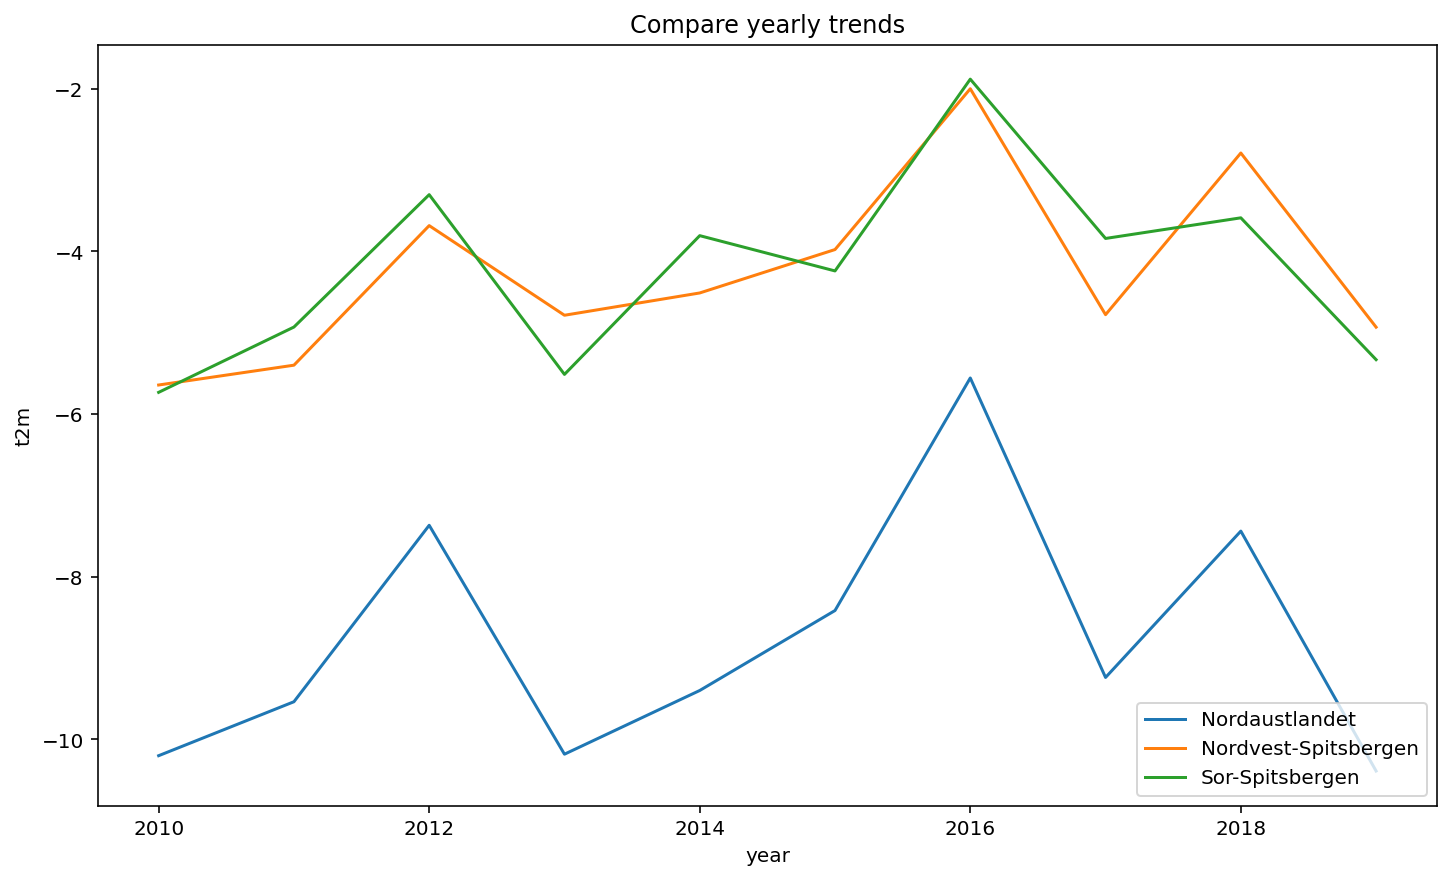

In [40]:


year_annual = (var-273.15).groupby('time.year').mean(dim='time')
year_annual.sel(longitude=lon1, latitude=lat1, method = 'nearest').plot.line(x="year")
year_annual.sel(longitude=lon2, latitude=lat2, method = 'nearest').plot.line(x="year")
year_annual.sel(longitude=lon3, latitude=lat3, method = 'nearest').plot.line(x="year")
labels = ['Nordaustlandet','Nordvest-Spitsbergen','Sor-Spitsbergen']
plt.legend(labels,loc='lower right')
plt.title('Compare yearly trends')

Timeseries for selected months and locations

Text(0.5, 1.0, 'Compare trends')

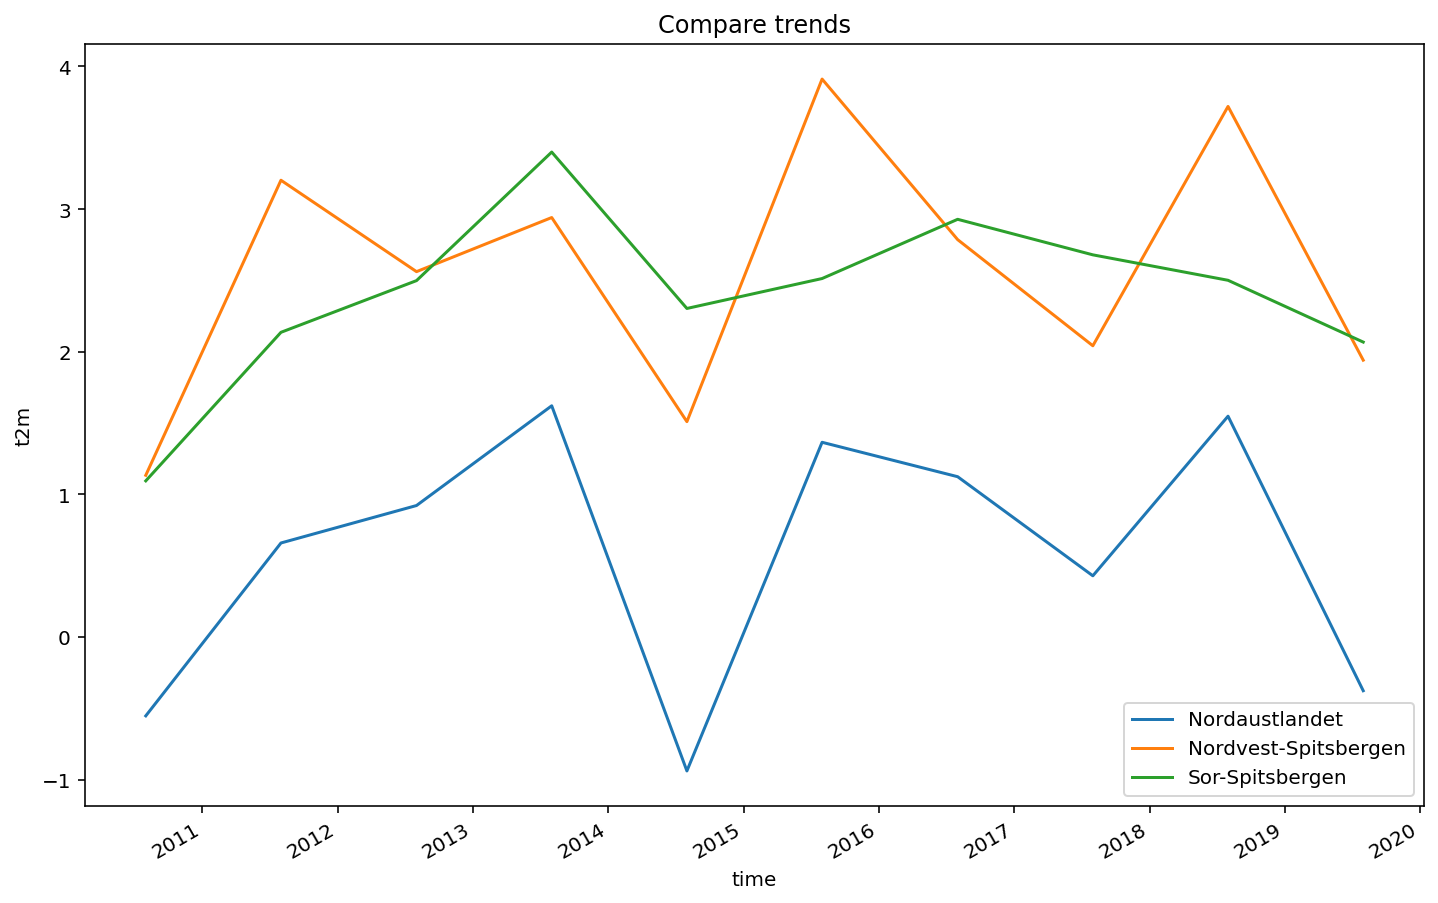

In [41]:

month=8 #9:September
(ds.t2m.sel(longitude=lon1, latitude=lat1,time=ds['time.month']==month, method = 'nearest')-273.15).plot.line(x="time")
(ds.t2m.sel(longitude=lon2, latitude=lat2,time=ds['time.month']==month, method = 'nearest')-273.15).plot.line(x="time")
(ds.t2m.sel(longitude=lon3, latitude=lat3,time=ds['time.month']==month, method = 'nearest')-273.15).plot.line(x="time")
labels = ['Nordaustlandet','Nordvest-Spitsbergen','Sor-Spitsbergen']
plt.legend(labels,loc='lower right')
plt.title('Compare trends')

Time series for a given season. Adapted from http://atedstone.github.io/rate-of-change-maps/

Text(0.5, 1.0, 'Compare seasonal trends (JJA)')

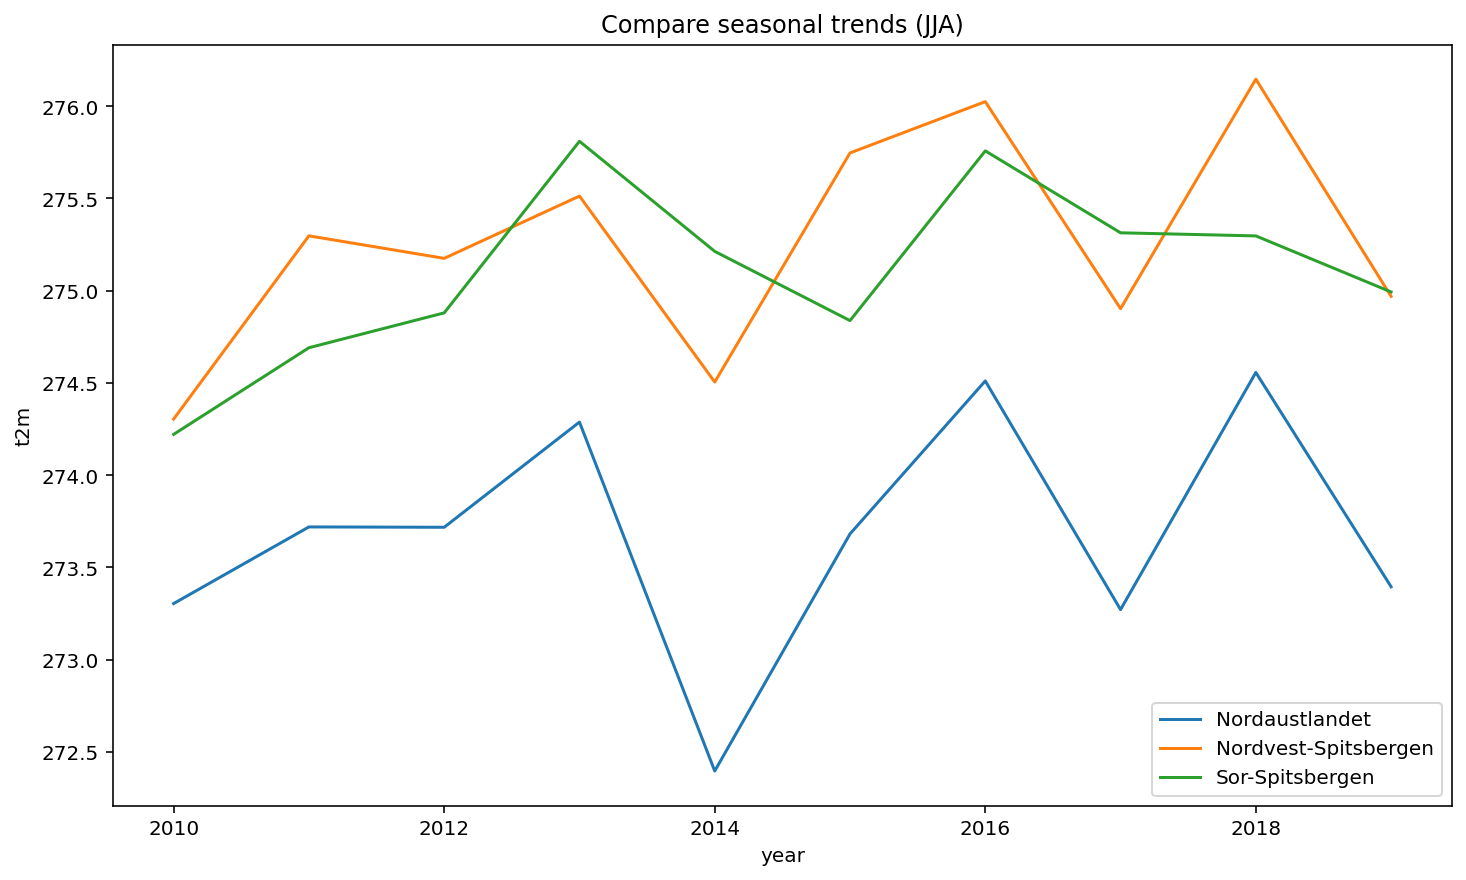

In [42]:
season_str='JJA' #('DJF','MAM','JJA','SON')
season_annual = ds['t2m'].where(ds['t2m']['time.season'] == season_str).groupby('time.year').mean(dim='time')
season_annual.sel(longitude=lon1, latitude=lat1, method = 'nearest').plot.line(x="year")
season_annual.sel(longitude=lon2, latitude=lat2, method = 'nearest').plot.line(x="year")
season_annual.sel(longitude=lon3, latitude=lat3, method = 'nearest').plot.line(x="year")
labels = ['Nordaustlandet','Nordvest-Spitsbergen','Sor-Spitsbergen']
plt.legend(labels,loc='lower right')
plt.title('Compare seasonal trends ('+ season_str+')')

In [43]:
print(ds.time[0])

<xarray.DataArray 'time' ()>
array('2010-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2010-01-01
Attributes:
    long_name:  time


In [0]:
                llevels = np.arange(-2000,0,250) # check etopo.ravel().max()

llevels